In [1]:
import sys

In [2]:
sys.path.append('/home/luo3300612/Workspace/PycharmWS/mySuperPoint/superpoint/model')

In [3]:
from utils import SuperPointFrontend

In [4]:
fe = SuperPointFrontend(weights_path="/home/luo3300612/Workspace/PycharmWS/mySuperPoint/superpoint/result/epoch17",
                          nms_dist=4,
                          conf_thresh=1/65,
                          cuda=False)

In [5]:
from torch.utils.data import DataLoader
from dataset import SyntheticData
from config import Config

In [6]:
dataset_root = Config.dataset_root
train_csv = Config.train_csv
test_csv = Config.test_csv
val_csv = Config.val_csv
model_save_path = Config.model_save_path

batch_size = 64

train_data = SyntheticData(train_csv, dataset_root,save_point=True)

test_data = SyntheticData(test_csv, dataset_root,save_point=True)

In [19]:
import matplotlib.pyplot as plt
from dataset import visulize
import numpy as np

def visulize_output(sample):
    img,label,pts_label = sample['img'],sample['label'],sample['pt']
    pts_pred,heatmap = fe.run(img)
    
    pts_pred = pts_pred[[1,0],:].T
    if heatmap is not None:
        plt.axis('off')
        plt.imshow(heatmap,cmap='gray')
    else:
        plt.axis('off')
        plt.imshow(np.zeros((120,160)),cmap='gray')
    plt.show()
    visulize(img=img,pt=pts_label,pts_color='r')
    visulize(img=img,pt=pts_pred,pts_color='b')
    return pts_pred,pts_label

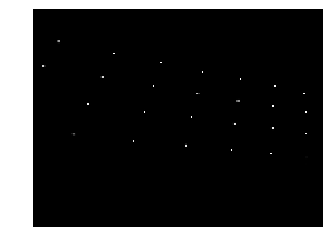

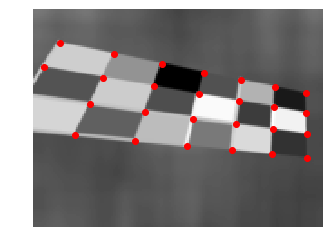

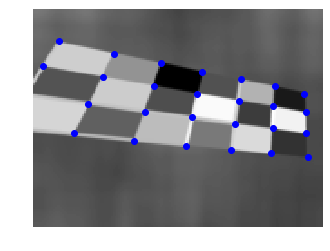

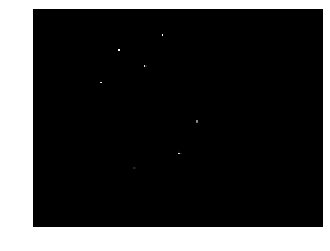

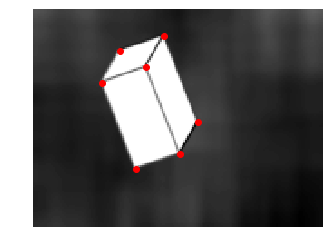

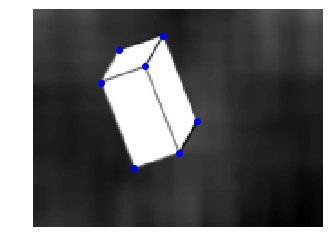

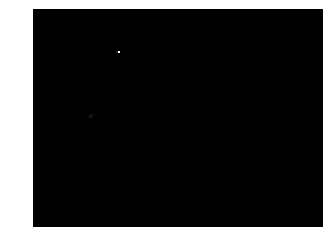

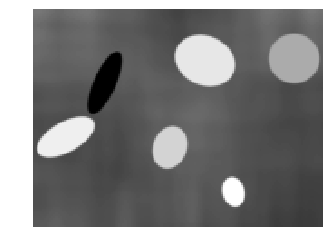

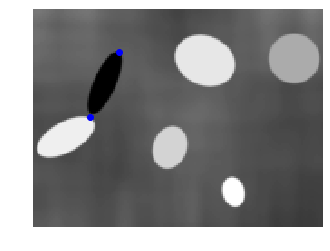

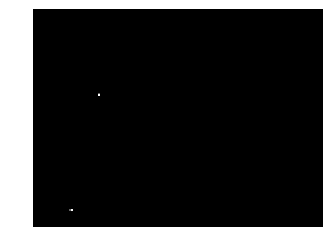

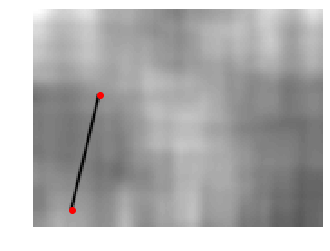

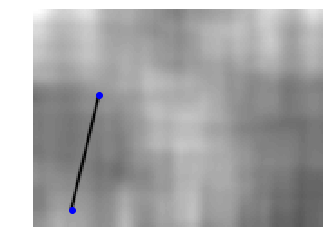

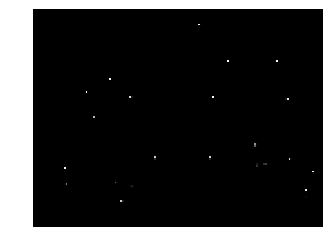

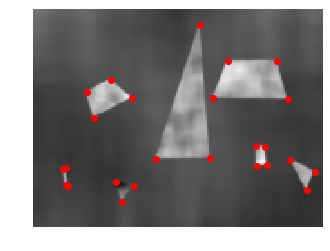

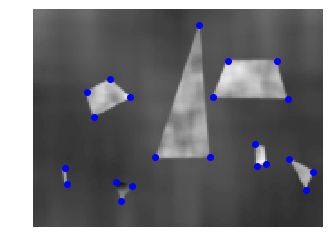

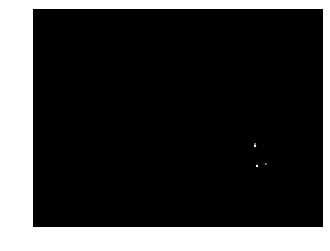

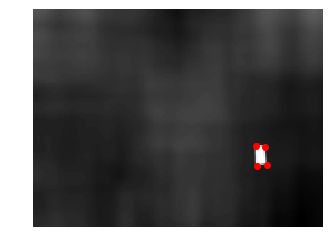

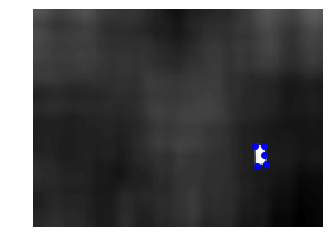

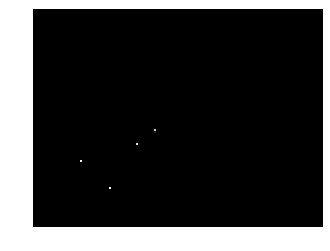

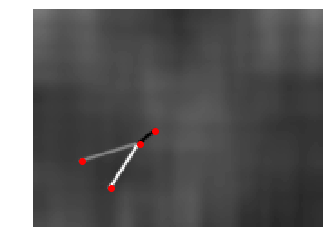

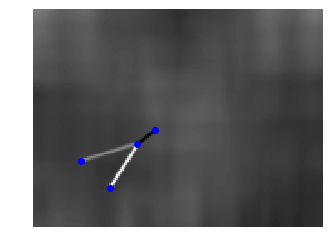

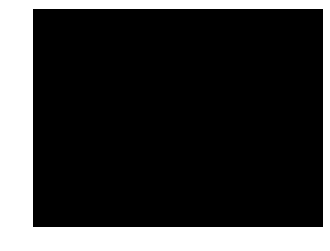

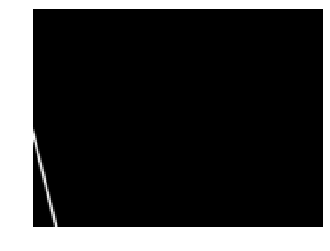

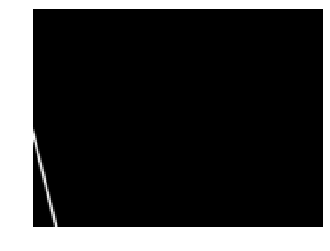

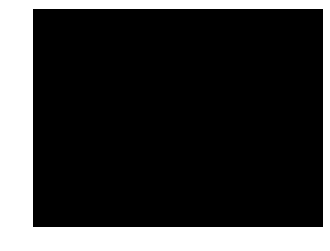

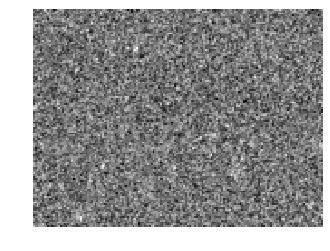

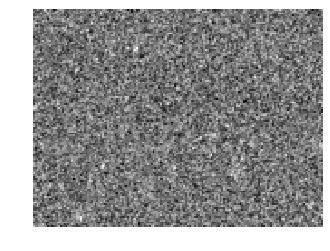

(array([], shape=(0, 2), dtype=float64),
 array([], shape=(0, 2), dtype=float64))

In [20]:
visulize_output(train_data[0])
visulize_output(train_data[10000])
visulize_output(train_data[20000])
visulize_output(train_data[30000])
visulize_output(train_data[40000])
visulize_output(train_data[50000])
visulize_output(train_data[60000])
visulize_output(train_data[70000])
visulize_output(train_data[80000])

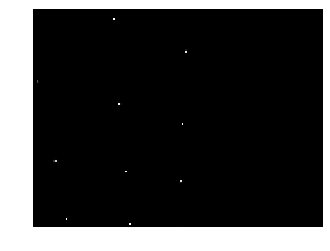

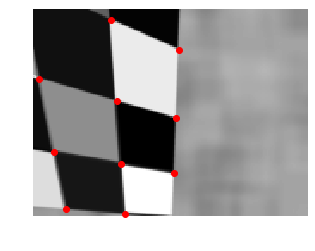

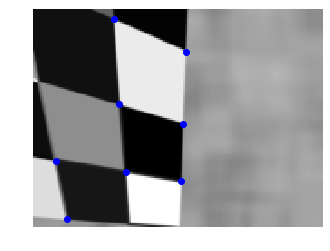

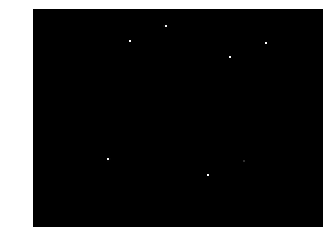

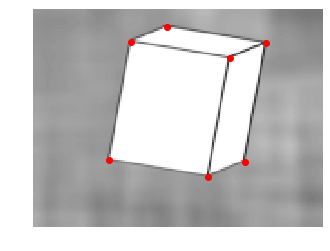

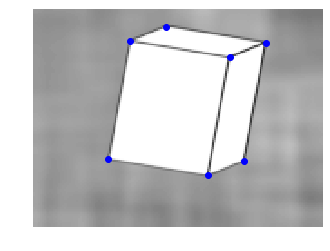

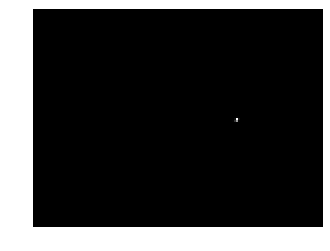

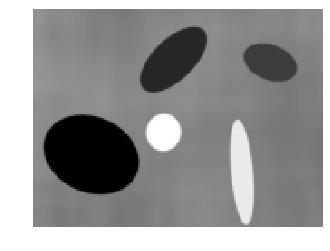

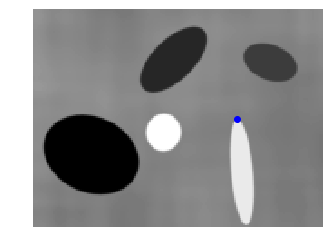

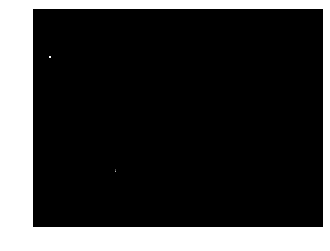

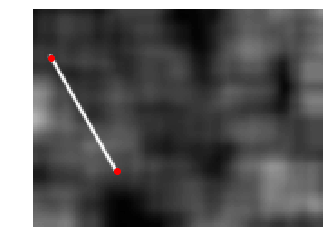

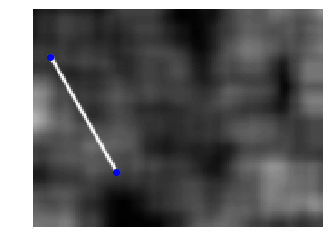

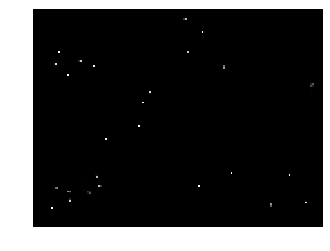

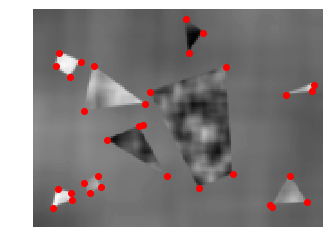

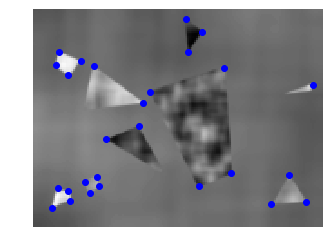

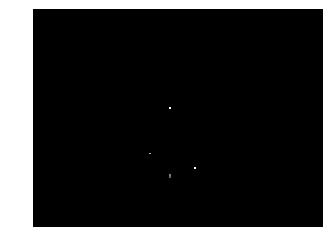

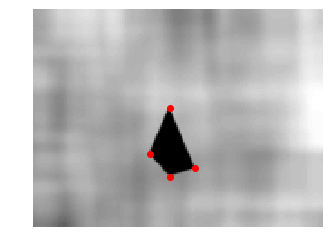

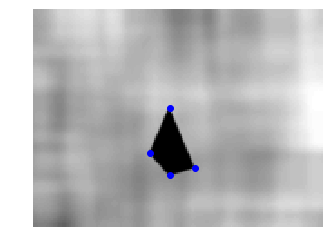

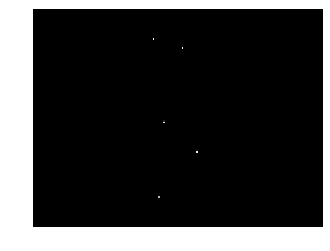

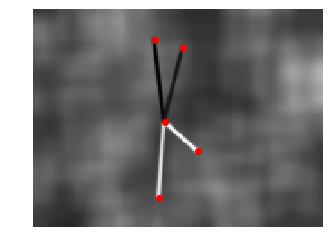

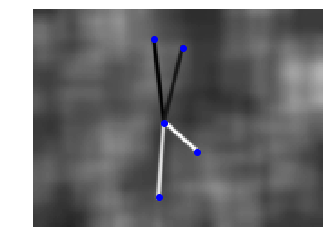

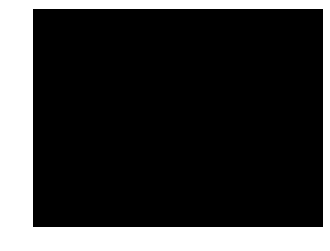

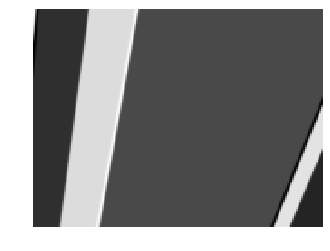

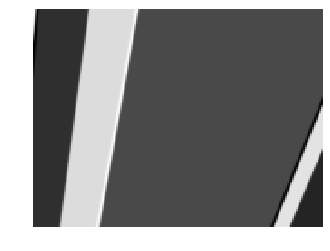

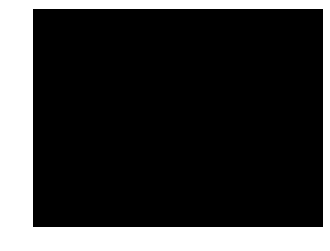

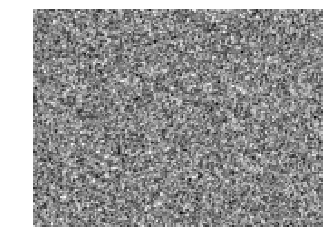

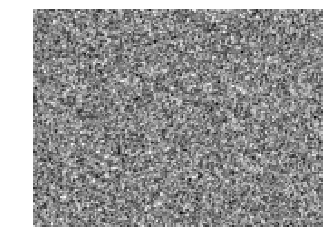

In [22]:
for i in range(9):
    visulize_output(test_data[i*500])

In [ ]:
test